In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Wrangle and Profile
What to do in the discover stage?
- Join datasets
- Data cleaning: formatting issues, missing data, faulty values and non-matching keys
(6pt)
- (opt) Visually show and explain the quality of your dataset
(10pt)

What to do in the profile stage?
- explore the data
- find interesting patterns in the data
- GOAL: find three insights and give a briefe explanation
(8pt per insight)

## Wrangle
Think about how to join both data sets, either on date or name of the video game? Is video game name join-able?

In [70]:
game_charts = pd.read_csv("../data/SteamCharts.csv", encoding="unicode_escape")
game_releases = pd.read_csv("../data/SteamReleases.csv")

In [71]:
game_charts.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.9567%
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.0893%
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.646%
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.4605%
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.0156%


In [72]:
game_releases.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


Attempt to merge both data frames on the name of the video game. Since I want to find which games had the most impact by the peak player count and not when the peak player count was.

In [73]:
game_charts['Name'] = game_charts['gamename']
game_charts.drop(columns=['gamename'], axis=1, inplace=True)

In [74]:
unique_games_releases = game_releases['Name'].unique()
unique_games_charts = game_charts['Name'].unique()

game_releases['Name'].nunique(), game_charts['Name'].nunique()

(71170, 1260)

Ok, in theory we would only have 1260 unique games that we can merge...

In [75]:
# try to find how many game titles overlap in both data sets
overlapping_games = [game for game in unique_games_charts if game in unique_games_releases]

print(f"Number of video games from charts data set found in releases dataset: {len(overlapping_games)}")

Number of video games from charts data set found in releases dataset: 946


Meaning, we have in total 946 video games that overlap in both data sets, where we have the release date, important meta data about the game and the monthly chart data.


Now let's start with joining both data sets.

In [76]:
df_games = pd.merge(game_releases, game_charts, on='Name', how='inner')
df_games.sort_values(by=['Name'], inplace=True)

df_games

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Genres,Tags,Screenshots,Movies,year,month,avg,gain,peak,avg_peak_perc
19452,282800,100% Orange Juice,"May 16, 2014",500000 - 1000000,252,0,1.74,34,100% Orange Juice is a digital multiplayer boa...,"['English', 'Japanese', 'Simplified Chinese', ...",...,"Indie,Strategy","Anime,Board Game,Cute,Multiplayer,Strategy,Car...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2014,March,0.11,NaN,3,3.6667%
19404,282800,100% Orange Juice,"May 16, 2014",500000 - 1000000,252,0,1.74,34,100% Orange Juice is a digital multiplayer boa...,"['English', 'Japanese', 'Simplified Chinese', ...",...,"Indie,Strategy","Anime,Board Game,Cute,Multiplayer,Strategy,Car...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2018,March,192.22,-113.79,450,42.7156%
19405,282800,100% Orange Juice,"May 16, 2014",500000 - 1000000,252,0,1.74,34,100% Orange Juice is a digital multiplayer boa...,"['English', 'Japanese', 'Simplified Chinese', ...",...,"Indie,Strategy","Anime,Board Game,Cute,Multiplayer,Strategy,Car...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2018,February,306.01,40.81,694,44.0937%
19406,282800,100% Orange Juice,"May 16, 2014",500000 - 1000000,252,0,1.74,34,100% Orange Juice is a digital multiplayer boa...,"['English', 'Japanese', 'Simplified Chinese', ...",...,"Indie,Strategy","Anime,Board Game,Cute,Multiplayer,Strategy,Car...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2018,January,265.20,-21.91,747,35.502%
19407,282800,100% Orange Juice,"May 16, 2014",500000 - 1000000,252,0,1.74,34,100% Orange Juice is a digital multiplayer boa...,"['English', 'Japanese', 'Simplified Chinese', ...",...,"Indie,Strategy","Anime,Board Game,Cute,Multiplayer,Strategy,Car...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2017,December,287.11,-7.70,905,31.7249%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34496,253710,theHunter Classic,"Jun 3, 2014",5000000 - 10000000,955,0,0.00,1,The most realistic online hunting game ever cr...,"['English', 'French', 'Italian', 'German', 'Sp...",...,"Action,Adventure,Free to Play,Simulation,Sports","Free to Play,Hunting,Multiplayer,Open World,Si...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2014,September,650.69,-63.60,1717,37.8969%
34495,253710,theHunter Classic,"Jun 3, 2014",5000000 - 10000000,955,0,0.00,1,The most realistic online hunting game ever cr...,"['English', 'French', 'Italian', 'German', 'Sp...",...,"Action,Adventure,Free to Play,Simulation,Sports","Free to Play,Hunting,Multiplayer,Open World,Si...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2014,October,909.46,258.77,2293,39.6625%
34494,253710,theHunter Classic,"Jun 3, 2014",5000000 - 10000000,955,0,0.00,1,The most realistic online hunting game ever cr...,"['English', 'French', 'Italian', 'German', 'Sp...",...,"Action,Adventure,Free to Play,Simulation,Sports","Free to Play,Hunting,Multiplayer,Open World,Si...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2014,November,844.43,-65.03,1683,50.1741%
34492,253710,theHunter Classic,"Jun 3, 2014",5000000 - 10000000,955,0,0.00,1,The most realistic online hunting game ever cr...,"['English', 'French', 'Italian', 'German', 'Sp...",...,"Action,Adventure,Free to Play,Simulation,Sports","Free to Play,Hunting,Multiplayer,Open World,Si...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2015,January,750.67,-8.77,1665,45.0853%


In [77]:
unique_merged_games = df_games['Name'].unique()
print(f"Unique number of games after the merge: {len(unique_merged_games)}")

Unique number of games after the merge: 946


In [78]:
not_merged_games = [game for game in unique_games_charts if game not in unique_merged_games]
not_merged_games[0:10]

["PLAYERUNKNOWN'S BATTLEGROUNDS",
 'Apex Legends',
 "Tom Clancy's Rainbow Six Siege",
 'Rocket League',
 "Sid Meier's Civilization VI",
 'The Elder Scrolls Online',
 'Spacewar',
 'SMITE',
 "Sid Meier's Civilization V",
 'EA SPORTS\x99 FIFA 21 ']

Originally we had 1260 games, so I checked game names again and there are a few differences on how both data sets stored names of video games. Here are some problems listed:
- usage of abbrevations: GOTY for Game Of The Year also for game names like PUBG = PLAYERUNKNOWN'S BATTLEGROUNDS
- different symbols: ® and ™
- non-latin characters: game releases uses these characters, while game charts has unicode instead
- check on same name is too strict: few games where not merged due to some capitalized names
- different naming in general: Names are essentiall the same, with minor difference like 'Fall Guys: Ultimate Knockout' in charts and 'Fall Guys' in releases data set

How can these problems be solved?
1. Remove special characters like symbols, unicode, empty strings and non-latin characters
2. Replace abbrevations as well as possible
3. Prepare best match to merge on, since entries in chart data set has multiple entries in the release data set
4. (opt)Compare should be not case-sensitive OR change all names to be lower/upper case

### 1. remove special characters

In [79]:
import re

def clean_name(name):
    # remove whitespace and special character
    name = name.replace('', '')
    name = name.replace('®', '')
    name = name.replace('™', '')
    name = name.replace('(TM)', '')

    # remove unicode
    name = re.sub(r'<U\+[0-9A-Fa-f]+>', '', name)

    # check for any non-latin characters in the name
    name = re.sub(r'[^\x00-\x7F]+', '', name)
    
    
    # remove any trailing or starting whitespaces
    name = name.strip()
    
    return name

In [80]:
game_charts['Name'] = game_charts['Name'].apply(lambda x: clean_name(x))
game_releases['Name'] = game_releases['Name'].apply(lambda x: clean_name(str(x)))

### 2. Replace abbrevations and missspellings (some of them...)

In [99]:
def replace_abbrevation(name):
    if 'GOTY' in name:
        name = name.replace('GOTY', 'Game of the Year')
    
    if "PLAYERUNKNOWN'S BATTLEGROUNDS" in name:
        name = name.replace("PLAYERUNKNOWN'S BATTLEGROUNDS", 'PUBG: BATTLEGROUNDS')

    if 'Meiers' in name:
        name = name.replace('Meiers', "Meier's")

    return name

In [83]:
game_charts['Name'] = game_charts['Name'].apply(lambda x: replace_abbrevation(x))
game_releases['Name'] = game_releases['Name'].apply(lambda x: replace_abbrevation(x))

### 3. Join again with best match

In [100]:
def best_match(name, options):
    matches = [option for option in options if name in option]
    
    # if only one option is found, then return this option
    # no or multiple options are discarded
    if len(matches) == 1:
        return matches[0]
    else:
        return name

In [101]:
game_charts['Best Name Match'] = game_charts['Name'].apply(lambda x: best_match(x, game_releases['Name']))

Ok now merge again

In [368]:
df_games = pd.DataFrame()

df_games = pd.merge(game_releases, game_charts, left_on='Name', right_on='Best Name Match', how='inner')
df_games.head()

,AppID,Name_x,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Screenshots,Movies,year,month,avg,gain,peak,avg_peak_perc,Name_y,Best Name Match
0,552520,Far Cry 5,2018-03-26,2000000 - 5000000,2164,17,59.99,5,Far Cry comes to America in the latest install...,"['English', 'French', 'Italian', 'German', 'Sp...",...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2021,February,3396.95,-2102.46,6521,52.0925%,Far Cry 5,Far Cry 5
1,552520,Far Cry 5,2018-03-26,2000000 - 5000000,2164,17,59.99,5,Far Cry comes to America in the latest install...,"['English', 'French', 'Italian', 'German', 'Sp...",...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2021,January,5499.41,1118.55,11476,47.921%,Far Cry 5,Far Cry 5
2,552520,Far Cry 5,2018-03-26,2000000 - 5000000,2164,17,59.99,5,Far Cry comes to America in the latest install...,"['English', 'French', 'Italian', 'German', 'Sp...",...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2020,December,4380.86,227.82,10024,43.7037%,Far Cry 5,Far Cry 5
3,552520,Far Cry 5,2018-03-26,2000000 - 5000000,2164,17,59.99,5,Far Cry comes to America in the latest install...,"['English', 'French', 'Italian', 'German', 'Sp...",...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2020,November,4153.04,1605.58,10527,39.4513%,Far Cry 5,Far Cry 5
4,552520,Far Cry 5,2018-03-26,2000000 - 5000000,2164,17,59.99,5,Far Cry comes to America in the latest install...,"['English', 'French', 'Italian', 'German', 'Sp...",...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2020,October,2547.45,338.54,9813,25.96%,Far Cry 5,Far Cry 5


In [369]:
# shows difference between Name in release and chart data set
# df_games.loc[df_games['Name_x'] != df_games['Name_y']]

In [370]:
# now we have two 'Name' columns
df_games['Name'] = df_games['Best Name Match']
df_games.drop(columns=['Name_x', 'Name_y', 'Best Name Match'], inplace=True)

df_games.sort_values(by=['Name'], inplace=True)

Rearange columns, that 'Name' is the front of the columns.

In [371]:
rearraged_columns = ['Name']
rearraged_columns.extend([col for col in df_games if col != 'Name'])

# Reorder columns
df_games = df_games[rearraged_columns]

### Result

In [372]:
unique_merged_games = df_games['Name'].unique()
print(f"Unique number of games after the merge: {len(unique_merged_games)}")

Unique number of games after the merge: 1107


After applying some transformation to the data and how the data sets are merged increased the number of unique games in the resulting data frame. Instead of 946 the merged data frame now has 1107, which is a huge increase!

### Clean the newly merged data frame

After joining, we can work on some errors in the data set. First, we can remove some columns, that do not add insights for the research question. Then we can rename the columns to follow uniform pattern and group the dataframe on video game name.

In [373]:
df_games.columns

Index(['Name', 'AppID', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies',
       'year', 'month', 'avg', 'gain', 'peak', 'avg_peak_perc'],
      dtype='object')

In [374]:
remove_cols = [
    'AppID', 'DLC count', 'About the game', 'Website', 'Support url', 
    'Support email', 'Metacritic url', 'Achievements', 'Recommendations',
    'Notes', 'Screenshots', 'Movies', 'Header image', 'Full audio languages', 
    'Reviews', 'Score rank', 'Peak CCU', # because we have peak from chart data set
]

In [375]:
if 'AppID' in df_games.columns:
    df_games.drop(columns=remove_cols, axis=1, inplace=True)

In [376]:
rename_chart_cols = {'year': 'Year', 'month': 'Month', 'avg': 'Avg CCU', 'gain': 'Gain', 'peak': 'Peak', 'avg_peak_perc': 'Avg_peak_ratio'}

df_games.rename(columns=rename_chart_cols, inplace=True)
df_games.sample(5)

,Name,Release date,Estimated owners,Required age,Price,Supported languages,Windows,Mac,Linux,Metacritic score,...,Publishers,Categories,Genres,Tags,Year,Month,Avg CCU,Gain,Peak,Avg_peak_ratio
16952,Sid Meier's Civilization V,2010-09-21,0 - 20000,0,29.99,"['English', 'French', 'German', 'Italian', 'Sp...",True,True,True,90,...,"2K,Aspyr (Mac),Aspyr (Linux)","Single-player,Multi-player,Steam Achievements,...",Strategy,"Turn-Based Strategy,Strategy,Turn-Based,Multip...",2015,June,31191.88,434.11,53711,58.0735%
60206,DC Universe Online,2011-11-02,2000000 - 5000000,0,0.00,['English'],True,False,False,72,...,Daybreak Game Company,"Multi-player,MMO,PvP,Online PvP,Co-op,Online C...","Action,Adventure,Free to Play,Massively Multip...","Free to Play,Superhero,MMORPG,Massively Multip...",2017,July,566.13,-105.47,1101,51.4196%
46221,Middle-earth: Shadow of Mordor,2014-09-30,5000000 - 10000000,0,19.99,"['English', 'French', 'Italian', 'German', 'Sp...",True,False,False,84,...,"Warner Bros. Interactive Entertainment,Warner ...","Single-player,Steam Achievements,Full controll...",NaN,"Open World,Action,Fantasy,Adventure,Third Pers...",2018,March,972.32,-238.50,2034,47.8033%
72336,Half-Life: Source,2004-06-01,2000000 - 5000000,0,9.99,"['English', 'French', 'German', 'Italian', 'Ja...",True,True,True,0,...,Valve,"Single-player,Remote Play Together",Action,"FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...",2016,September,35.46,-5.16,75,47.28%
38946,FINAL FANTASY VIII,2013-12-05,500000 - 1000000,13,11.99,"['English', 'French', 'Italian', 'German', 'Sp...",True,False,False,0,...,Square Enix,"Single-player,Steam Achievements,Partial Contr...",RPG,"JRPG,RPG,Classic,Singleplayer,Great Soundtrack...",2016,January,522.34,181.13,1006,51.9225%


Now, we can also reformat the release date into a date time format and also introduce a new date 'Chart date', that will help in showing when the chart data is taken.

In [377]:
# remove trailing white space in month column
df_games['Month'] = df_games['Month'].apply(lambda x: x.strip())

In [378]:
df_games['Release date'] = pd.to_datetime(df_games['Release date'], format='mixed')
df_games['Chart date'] = pd.to_datetime(df_games['Year'].astype(str) + '-' + df_games['Month'].astype(str), format='%Y-%B')

In [379]:
df_games.sample(5)

,Name,Release date,Estimated owners,Required age,Price,Supported languages,Windows,Mac,Linux,Metacritic score,...,Categories,Genres,Tags,Year,Month,Avg CCU,Gain,Peak,Avg_peak_ratio,Chart date
39105,RaceRoom Racing Experience,2013-02-12,2000000 - 5000000,0,0.00,"['English', 'French', 'German', 'Italian', 'Sp...",True,False,False,0,...,"Single-player,Multi-player,PvP,Online PvP,Stea...","Free to Play,Racing,Simulation,Sports","Free to Play,Racing,Simulation,Realistic,Autom...",2013,May,122.62,-0.43,300,40.8733%,2013-05-01
65445,Deus Ex: Human Revolution - Director's Cut,2013-10-25,2000000 - 5000000,17,19.99,"['English', 'French', 'Italian', 'German', 'Sp...",True,False,False,91,...,"Single-player,Steam Achievements,Steam Trading...","Action,RPG","Cyberpunk,Stealth,RPG,Sci-fi,FPS,Action,Single...",2017,January,374.27,8.39,899,41.6318%,2017-01-01
27937,Divinity: Original Sin 2 - Definitive Edition,2017-09-14,2000000 - 5000000,0,44.99,"['English', 'French', 'German', 'Russian', 'Po...",True,True,False,93,...,"Single-player,Multi-player,PvP,Online PvP,Shar...","Adventure,RPG,Strategy","Tactical RPG,RPG,Turn-Based Strategy,Explorati...",2020,August,9457.51,-3232.78,16765,56.4122%,2020-08-01
24261,ArcheAge,2015-03-26,1000000 - 2000000,17,0.00,"['English', 'French', 'German']",True,False,False,80,...,"Multi-player,MMO,Steam Trading Cards,In-App Pu...","Free to Play,Massively Multiplayer,RPG","Massively Multiplayer,Free to Play,MMORPG,Open...",2015,November,1946.40,-521.73,3187,61.0731%,2015-11-01
8984,Age of Empires II (2013),2013-04-09,5000000 - 10000000,0,19.99,"['English', 'German', 'French', 'Italian', 'Ko...",True,False,False,68,...,"Single-player,Multi-player,Steam Achievements,...",Strategy,"Strategy,RTS,Medieval,Multiplayer,Classic,Hist...",2018,May,7630.76,-523.09,13442,56.768%,2018-05-01


Transform Categories, Genres and Tags from string into array.

In [380]:
df_games['Categories'] = df_games['Categories'].str.split(',')
df_games['Genres'] = df_games['Genres'].str.split(',')
df_games['Tags'] = df_games['Tags'].str.split(',')


In [381]:
df_games.sample(5)

,Name,Release date,Estimated owners,Required age,Price,Supported languages,Windows,Mac,Linux,Metacritic score,...,Categories,Genres,Tags,Year,Month,Avg CCU,Gain,Peak,Avg_peak_ratio,Chart date
66587,Antichamber,2013-01-31,1000000 - 2000000,0,19.99,['English'],True,True,True,82,...,"[Single-player, Steam Trading Cards]","[Adventure, Indie]","[Puzzle, First-Person, Indie, Surreal, Explora...",2012,October,0.00,0.00,0,NaN%,2012-10-01
71178,Mad Games Tycoon,2016-09-13,200000 - 500000,0,14.99,"['English', 'German', 'French', 'Turkish', 'Cz...",True,True,False,0,...,"[Single-player, Steam Achievements]","[Casual, Indie, Simulation, Strategy]","[Management, Simulation, Strategy, Indie, Econ...",2019,June,56.30,-3.72,110,51.1818%,2019-06-01
28511,Deadlight,2012-10-25,500000 - 1000000,17,14.99,"['English', 'German', 'French', 'Italian', 'Sp...",True,False,False,78,...,"[Single-player, Steam Achievements, Full contr...","[Action, Adventure, Indie]","[Zombies, Platformer, Indie, Action, Post-apoc...",2019,April,4.42,-2.04,15,29.4667%,2019-04-01
69999,Injustice 2,2017-11-30,500000 - 1000000,0,49.99,"['English', 'French', 'Italian', 'German', 'Sp...",True,False,False,86,...,"[Single-player, Multi-player, PvP, Online PvP,...",[Action],"[Fighting, Action, Superhero, Multiplayer, Loc...",2020,May,201.80,-90.35,321,62.866%,2020-05-01
908,Fallout: New Vegas,2010-10-19,2000000 - 5000000,16,9.99,"['English', 'French', 'German', 'Italian', 'Sp...",True,False,False,84,...,"[Single-player, Steam Achievements, Partial Co...","[Action, RPG]","[Open World, RPG, Post-apocalyptic, Singleplay...",2014,April,3589.34,-43.80,6737,53.278%,2014-04-01


### Check for missing data

In [382]:
df_games.isna().sum()

Name                             0
Release date                     0
Estimated owners                 0
Required age                     0
Price                            0
Supported languages              0
Windows                          0
Mac                              0
Linux                            0
Metacritic score                 0
User score                       0
Positive                         0
Negative                         0
Average playtime forever         0
Average playtime two weeks       0
Median playtime forever          0
Median playtime two weeks        0
Developers                       0
Publishers                     227
Categories                     259
Genres                          79
Tags                           503
Year                             0
Month                            0
Avg CCU                          0
Gain                          1140
Peak                             0
Avg_peak_ratio                   0
Chart date          

Missing 'Publishers' is not a problem since the 'Developers' does not have any missing values. So, we can just safely introduce a new value 'None'.

In [383]:
df_games.loc[df_games['Publishers'].isna(), 'Publishers'] = 'None'
assert df_games.loc[df_games['Publishers'].isna()].shape[0] == 0, "Publishers still has empty values"

Empty Categories, Genres and Tags is hard to replace because it is usually set by developer in the Steam shop. So, depending on the analysis of the game genre or gameplay type (Single-, Multiplayer, ...) we need to exclude these values. So we have two options:
- remove entries
- interpolate entries: E.g. if genre is empty, search for similar entries with Tags and Categories and then use genres from similar entries

First, check the games for the missing values.

In [384]:
games_missing_genres = df_games.loc[df_games['Genres'].isna()]['Name'].unique()
games_missing_categories = df_games.loc[df_games['Categories'].isna()]['Name'].unique()
games_missing_tags = df_games.loc[df_games['Tags'].isna()]['Name'].unique()

In [385]:
print(games_missing_genres)
print(games_missing_categories)
print(games_missing_tags)

['Middle-earth: Shadow of Mordor']
['Aseprite' 'Blender' 'OVR Advanced Settings' 'ShareX' 'Soundpad'
 'YoloMouse']
['Artifact' 'F.E.A.R.' 'Gauntlet' 'Men of War: Assault Squad 2' 'RIFT']


Missing categories seem to be software and not games, safe to remove, the other will get a new value 'None'.

In [386]:
df_games.loc[df_games['Genres'].isna(), 'Genres'] = 'None'
df_games.loc[df_games['Tags'].isna(), 'Tags'] = 'None'

In [387]:
df_games.dropna(subset=['Categories'], inplace=True)
assert df_games['Categories'].isna().sum() == 0, "Categories still has empty values"

Missing values in 'Gain' are not a huge deal because we might not need this column for expolring the data. We can just set the NaN values to 0.

In [388]:
df_games.loc[df_games['Gain'].isna(), 'Gain'] = 0

assert df_games.loc[df_games['Gain'].isna()].shape[0] == 0, "Gain still has empty values"

Check missing values again

In [389]:
df_games.isna().sum()

Name                          0
Release date                  0
Estimated owners              0
Required age                  0
Price                         0
Supported languages           0
Windows                       0
Mac                           0
Linux                         0
Metacritic score              0
User score                    0
Positive                      0
Negative                      0
Average playtime forever      0
Average playtime two weeks    0
Median playtime forever       0
Median playtime two weeks     0
Developers                    0
Publishers                    0
Categories                    0
Genres                        0
Tags                          0
Year                          0
Month                         0
Avg CCU                       0
Gain                          0
Peak                          0
Avg_peak_ratio                0
Chart date                    0
dtype: int64

### Adjust to covid time range

In [390]:
COVID_PERIOD = ['2020-01-30', '2023-05-05']
def limit_date_to_covid_period(df):
    return df.loc[(df['Chart date'] >= COVID_PERIOD[0]) & (df['Chart date'] <= COVID_PERIOD[1])]

In [391]:
# df_games = limit_date_to_covid_period(df_games)

Finishes joined data frame

In [392]:
df_games

,Name,Release date,Estimated owners,Required age,Price,Supported languages,Windows,Mac,Linux,Metacritic score,...,Categories,Genres,Tags,Year,Month,Avg CCU,Gain,Peak,Avg_peak_ratio,Chart date
32328,(Gujian3),2018-12-14,500000 - 1000000,0,29.99,"['Simplified Chinese', 'English', 'Traditional...",True,False,False,0,...,"[Single-player, Steam Achievements, Partial Co...",[RPG],"[RPG, Story Rich, Action RPG, Martial Arts, Si...",2020,December,422.11,-47.02,1470,28.715%,2020-12-01
32326,(Gujian3),2018-12-14,500000 - 1000000,0,29.99,"['Simplified Chinese', 'English', 'Traditional...",True,False,False,0,...,"[Single-player, Steam Achievements, Partial Co...",[RPG],"[RPG, Story Rich, Action RPG, Martial Arts, Si...",2021,February,1021.99,563.24,3247,31.4749%,2021-02-01
32327,(Gujian3),2018-12-14,500000 - 1000000,0,29.99,"['Simplified Chinese', 'English', 'Traditional...",True,False,False,0,...,"[Single-player, Steam Achievements, Partial Co...",[RPG],"[RPG, Story Rich, Action RPG, Martial Arts, Si...",2021,January,458.75,36.64,1280,35.8398%,2021-01-01
32329,(Gujian3),2018-12-14,500000 - 1000000,0,29.99,"['Simplified Chinese', 'English', 'Traditional...",True,False,False,0,...,"[Single-player, Steam Achievements, Partial Co...",[RPG],"[RPG, Story Rich, Action RPG, Martial Arts, Si...",2020,November,469.13,83.05,1721,27.2592%,2020-11-01
32330,(Gujian3),2018-12-14,500000 - 1000000,0,29.99,"['Simplified Chinese', 'English', 'Traditional...",True,False,False,0,...,"[Single-player, Steam Achievements, Partial Co...",[RPG],"[RPG, Story Rich, Action RPG, Martial Arts, Si...",2020,October,386.08,-3.78,1028,37.5564%,2020-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46293,theHunter: Call of the Wild,2017-02-16,2000000 - 5000000,0,19.99,"['English', 'French', 'German', 'Portuguese - ...",True,False,False,0,...,"[Single-player, Multi-player, Co-op, Online Co...","[Adventure, Simulation, Sports]","[Hunting, Open World, Multiplayer, Simulation,...",2018,October,1171.68,-141.99,2351,49.8375%,2018-10-01
46292,theHunter: Call of the Wild,2017-02-16,2000000 - 5000000,0,19.99,"['English', 'French', 'German', 'Portuguese - ...",True,False,False,0,...,"[Single-player, Multi-player, Co-op, Online Co...","[Adventure, Simulation, Sports]","[Hunting, Open World, Multiplayer, Simulation,...",2018,November,1127.33,-44.35,2873,39.2388%,2018-11-01
46291,theHunter: Call of the Wild,2017-02-16,2000000 - 5000000,0,19.99,"['English', 'French', 'German', 'Portuguese - ...",True,False,False,0,...,"[Single-player, Multi-player, Co-op, Online Co...","[Adventure, Simulation, Sports]","[Hunting, Open World, Multiplayer, Simulation,...",2018,December,1464.77,337.44,3001,48.8094%,2018-12-01
46302,theHunter: Call of the Wild,2017-02-16,2000000 - 5000000,0,19.99,"['English', 'French', 'German', 'Portuguese - ...",True,False,False,0,...,"[Single-player, Multi-player, Co-op, Online Co...","[Adventure, Simulation, Sports]","[Hunting, Open World, Multiplayer, Simulation,...",2018,January,1918.22,-215.16,4122,46.5361%,2018-01-01


### Visualize quality of data set

Options:
- number of games before and after merge
- peak ccu with release data set vs merged games peak ccu data set

**Number of games before and after merge**

In [409]:
number_game_mergable = game_charts['Name'].nunique()
number_game_merged = df_games['Name'].nunique()
available_games = game_releases['Name'].nunique()

labels = ['Games merged', 'Possible game merges', 'Available Games']
values = [number_game_merged, number_game_mergable, available_games]

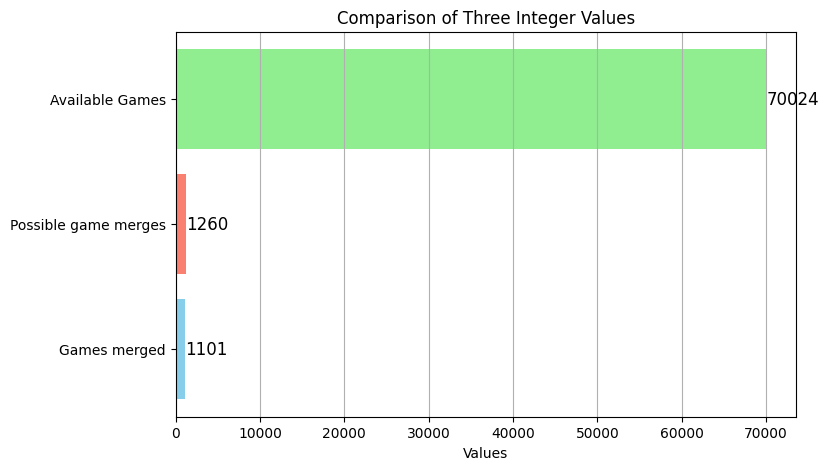

In [410]:
plt.figure(figsize=(8, 5))
plt.barh(labels, values, color=['skyblue', 'lightgreen'])

# Adding data labels
for i, value in enumerate(values):
    plt.text(value, i, str(value), ha='left', va='center', fontsize=12, color='black')

# Title and labels
plt.xlabel('Number of games')
plt.title('Possible merge-able Games and available Games')
plt.grid(axis='x')

plt.show()

**Show peak ccu with release data set vs merged games peak ccu data set**

In [394]:
# draw sample
game_sample = [
    'Counter-Strike: Global Offensive',
    'Dota 2',
    'PUBG: BATTLEGROUNDS',
    'Apex Legends',
    'Grand Theft Auto V',
]

In [395]:
# filter game releases data set and merged data set
filtered_game_releases = game_releases[game_releases['Name'].isin(game_sample)]
filtered_df_games = df_games[df_games['Name'].isin(game_sample)]

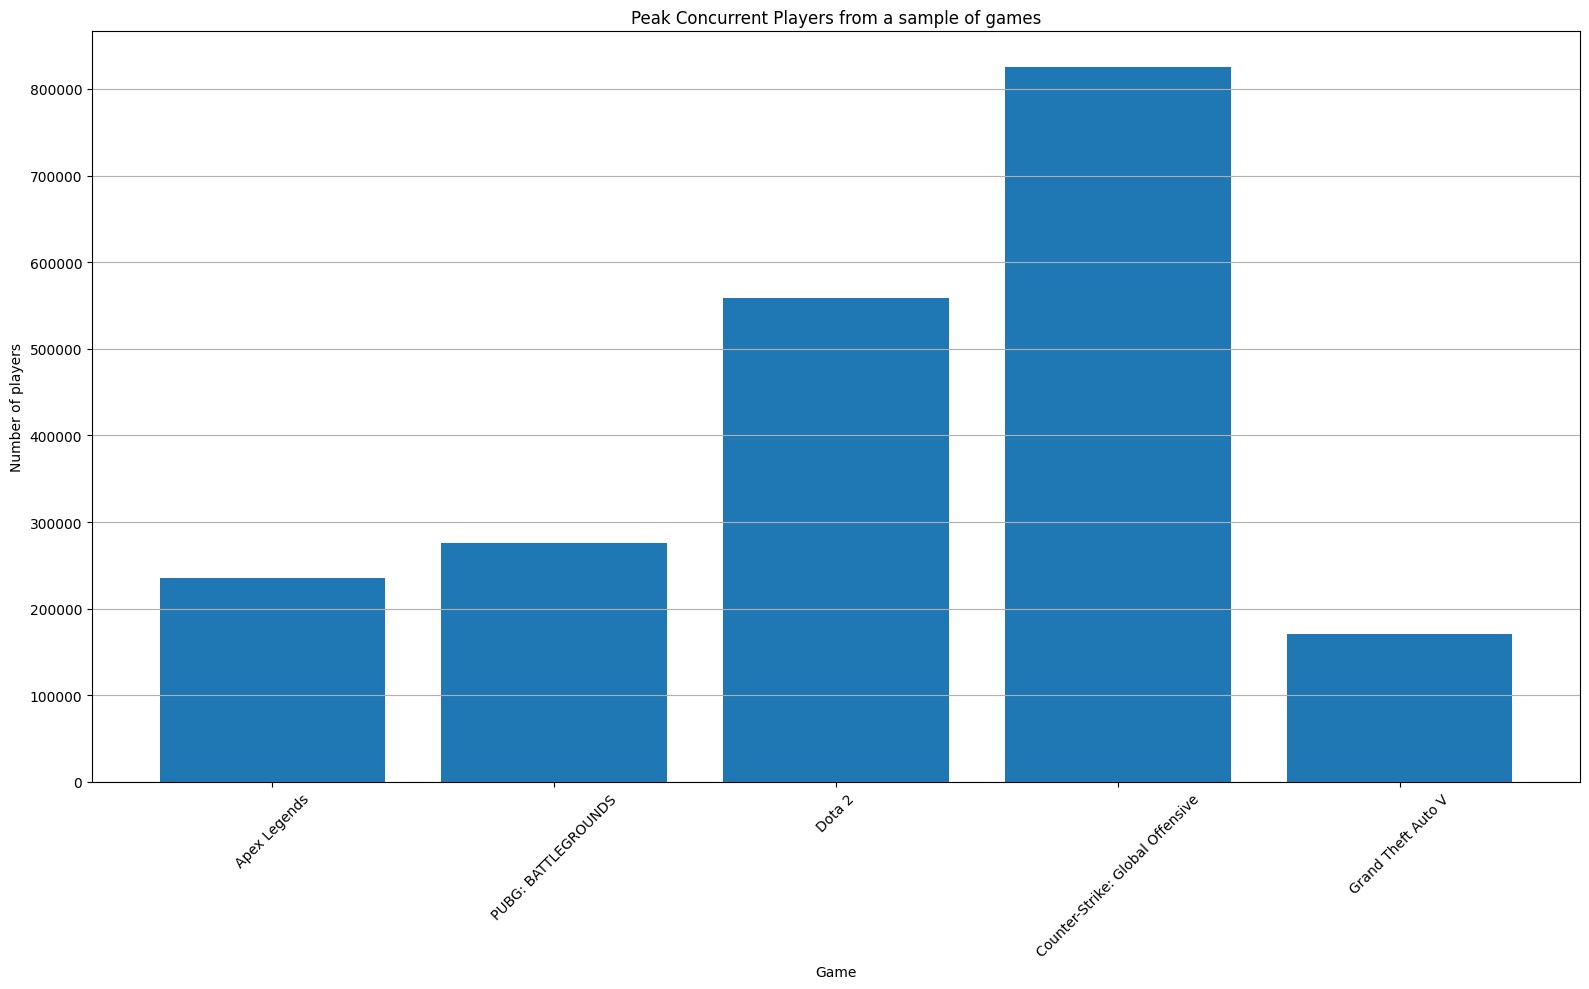

In [399]:
plt.figure(figsize=(16,10))
plt.bar(filtered_game_releases['Name'], filtered_game_releases['Peak CCU'])
plt.title('Peak Concurrent Players from a sample of games')
plt.xlabel('Game')
plt.ylabel('Number of players')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

In [403]:
filtered_df_games_pivot = filtered_df_games.pivot(index='Chart date', columns='Name', values='Peak')

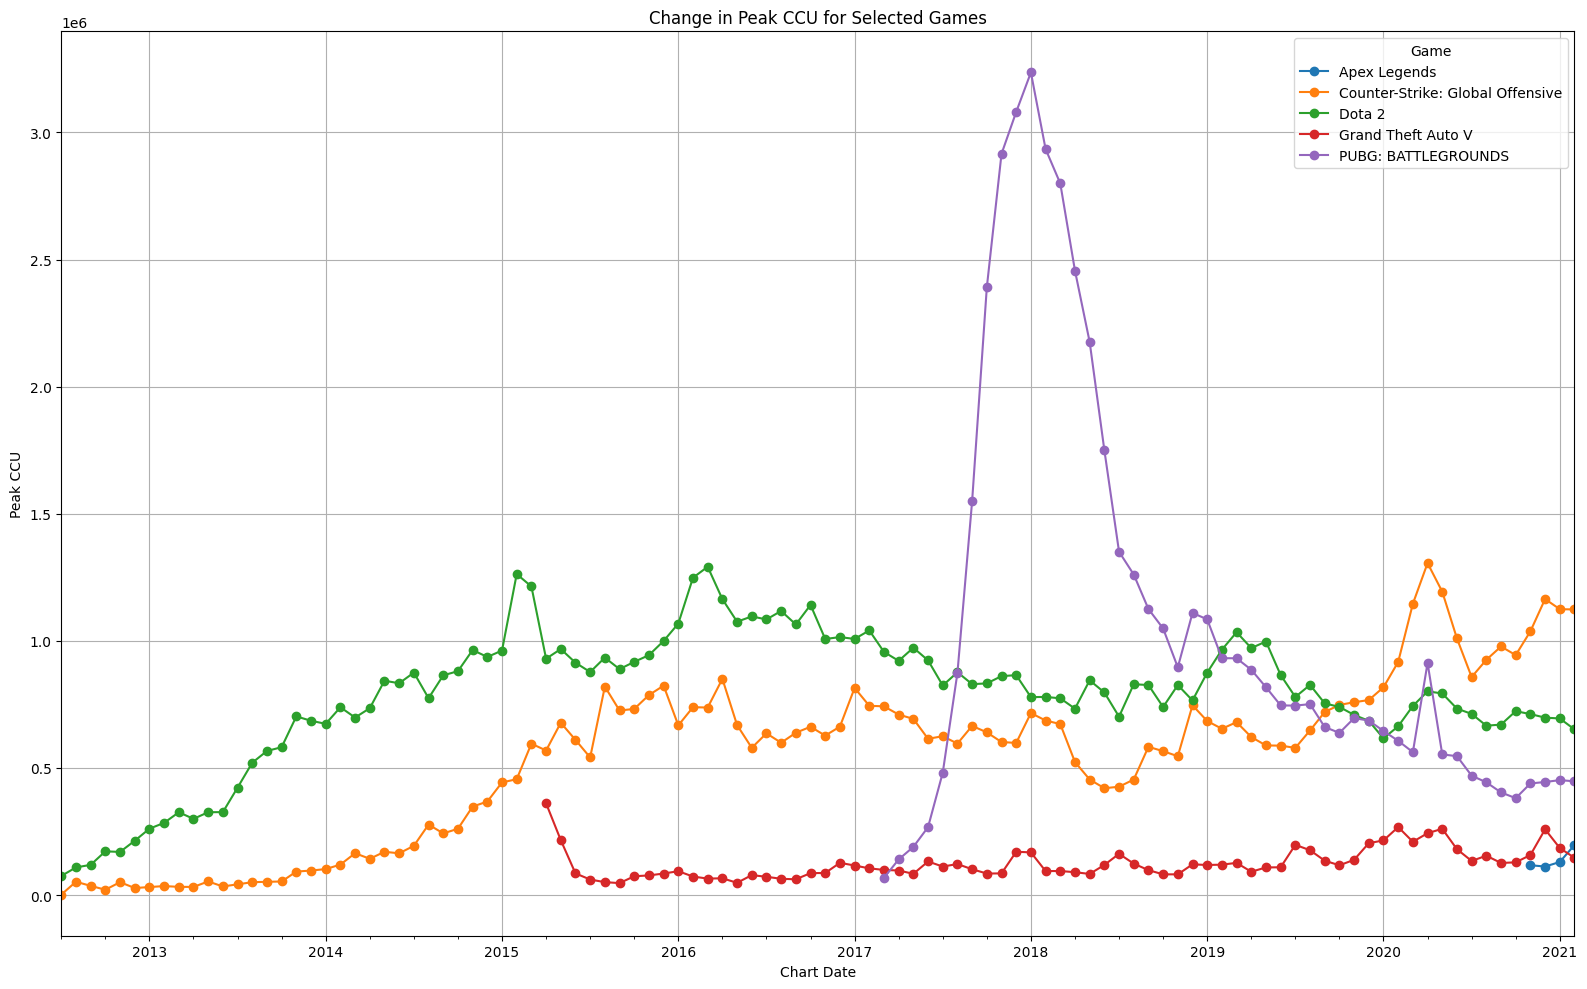

In [404]:
filtered_df_games_pivot.plot(kind='line', marker='o', figsize=(16, 10))
plt.xlabel('Chart Date')
plt.ylabel('Peak CCU')
plt.title('Change in Peak CCU for Selected Games')
plt.legend(title='Game')

plt.grid(True)
plt.tight_layout()
plt.show()

This second graph perfectly showcases why this merged dataset can give crucial insights in how the gaming market changed in recent years. The bar plot shows the same information, namely the peak number of concurrent players, but with the drawback that we do not know when this peak was measured. Meaning, we cannot say when this peak occured. With the new merged data set, we can see a trend in concurrent player over the years, while stil keeping the peak of the most concurrent player. 